#### Import Library

In [2]:
import pandas as pd


import matplotlib.pyplot as plt

#### Load Data

In [3]:
# loading the data
pd.set_option('display.max_columns', None)
accident_df = pd.read_csv('../DSME6756-Project/data/US_Accidents_March23.csv')
accident_df.head(2)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day


### Data Cleansing

##### 1. Formatting Start_Time & End_Time

In [4]:
# Transform the date fomat 
accident_df['Start_Time'] = pd.to_datetime(accident_df['Start_Time'],format='ISO8601')
accident_df['End_Time'] = pd.to_datetime(accident_df['End_Time'],format='ISO8601')
accident_df.head(2)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day


##### 2. One-hot handling

In [5]:
# Prepare day_of_week
accident_df = accident_df.copy()
accident_df['Start_Day'] = accident_df['Start_Time'].dt.date
accident_df['End_Day'] = accident_df['End_Time'].dt.date
accident_df['Date'] = pd.to_datetime(accident_df['Start_Day'])
accident_df['day_of_week'] = accident_df['Date'].dt.day_name()

one_hot_weather = pd.get_dummies(accident_df['Weather_Condition'])
# Join the weekday data 
one_hot_weather = one_hot_weather.astype(int)
accident_df = accident_df.join(one_hot_weather)

one_hot_weekday = pd.get_dummies(accident_df['day_of_week'])
# Join the weekday data 
accident_dur_df_joined = accident_df.join(one_hot_weekday)

#### 2. Duration of Accident (Min.)

In [6]:
# accident_dur_df_joined = accident_dur_df_joined[accident_dur_df_joined.County == 'Los Angeles']
accident_dur_df_joined = accident_dur_df_joined[accident_dur_df_joined.County == 'Miami-Dade']
print(len(accident_dur_df_joined))

251601


In [7]:
accident_dur_df_joined['Duration_Minutes'] = (accident_dur_df_joined['End_Time'] - accident_dur_df_joined['Start_Time']).dt.total_seconds() / 60
#accident_dur_df_joined = accident_dur_df_joined[accident_dur_df_joined['Duration_Minutes'] < 1000]
accident_dur_df_joined = accident_dur_df_joined[accident_dur_df_joined['Duration_Minutes'] > 1500]
print(len(accident_dur_df_joined))

1446


##### 2. Remove unrelevant columns

In [8]:
columns_to_remove = ['End_Lat', 'End_Lng', 'Description'
                     , 'Start_Lat', 'Start_Lng', 'Source'
                     , 'Zipcode', 'Airport_Code'
                     , 'Timezone', 'Weather_Timestamp'
                     , 'Severity', 'ID'
                     , 'Start_Day', 'End_Day'
                     , 'Start_Time', 'End_Time'
                     , 'Date'
                     , 'Country'
                     , 'State'
                     , 'County'
                     # , 'City'
                     # , 'Street'
                     ,]

# Remove columns from the DataFrame
# Check if each column exists before dropping it
for col in columns_to_remove:
    if col in accident_dur_df_joined.columns:
        accident_dur_df_joined = accident_dur_df_joined.drop(columns=col, axis=1)

In [9]:
accident_dur_df_joined.head(2)

,Distance(mi),Street,City,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,day_of_week,Blowing Dust,Blowing Dust / Windy,Blowing Sand,Blowing Snow,Blowing Snow / Windy,Blowing Snow Nearby,Clear,Cloudy,Cloudy / Windy,Drifting Snow,Drifting Snow / Windy,Drizzle,Drizzle / Windy,Drizzle and Fog,Dust Whirls,Duststorm,Fair,Fair / Windy,Fog,Fog / Windy,Freezing Drizzle,Freezing Rain,Freezing Rain / Windy,Funnel Cloud,Hail,Haze,Haze / Windy,Heavy Blowing Snow,Heavy Drizzle,Heavy Freezing Drizzle,Heavy Freezing Rain,Heavy Freezing Rain / Windy,Heavy Ice Pellets,Heavy Rain,Heavy Rain / Windy,Heavy Rain Shower,Heavy Rain Shower / Windy,Heavy Rain Showers,Heavy Sleet,Heavy Sleet / Windy,Heavy Sleet and Thunder,Heavy Smoke,Heavy Snow,Heavy Snow / Windy,Heavy Snow with Thunder,Heavy T-Storm,Heavy T-Storm / Windy,Heavy Thunderstorms and Rain,Heavy Thunderstorms and Snow,Heavy Thunderstorms with Small Hail,Ice Pellets,Light Blowing Snow,Light Drizzle,Light Drizzle / Windy,Light Fog,Light Freezing Drizzle,Light Freezing Fog,Light Freezing Rain,Light Freezing Rain / Windy,Light Hail,Light Haze,Light Ice Pellets,Light Rain,Light Rain / Windy,Light Rain Shower,Light Rain Shower / Windy,Light Rain Showers,Light Rain with Thunder,Light Sleet,Light Sleet / Windy,Light Snow,Light Snow / Windy,Light Snow Grains,Light Snow Shower,Light Snow Shower / Windy,Light Snow Showers,Light Snow and Sleet,Light Snow and Sleet / Windy,Light Snow with Thunder,Light Thunderstorm,Light Thunderstorms and Rain,Light Thunderstorms and Snow,Low Drifting Snow,Mist,Mist / Windy,Mostly Cloudy,Mostly Cloudy / Windy,N/A Precipitation,Overcast,Partial Fog,Partial Fog / Windy,Partly Cloudy,Partly Cloudy / Windy,Patches of Fog,Patches of Fog / Windy,Rain,Rain / Windy,Rain Shower,Rain Shower / Windy,Rain Showers,Rain and Sleet,Sand,Sand / Dust Whirls Nearby,Sand / Dust Whirlwinds,Sand / Dust Whirlwinds / Windy,Sand / Windy,Scattered Clouds,Shallow Fog,Shallow Fog / Windy,Showers in the Vicinity,Sleet,Sleet / Windy,Sleet and Thunder,Small Hail,Smoke,Smoke / Windy,Snow,Snow / Windy,Snow Grains,Snow Showers,Snow and Sleet,Snow and Sleet / Windy,Snow and Thunder,Snow and Thunder / Windy,Squalls,Squalls / Windy,T-Storm,T-Storm / Windy,Thunder,Thunder / Windy,Thunder / Wintry Mix,Thunder / Wintry Mix / Windy,Thunder and Hail,Thunder and Hail / Windy,Thunder in the Vicinity,Thunderstorm,Thunderstorms and Rain,Thunderstorms and Snow,Tornado,Volcanic Ash,Widespread Dust,Widespread Dust / Windy,Wintry Mix,Wintry Mix / Windy,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Duration_Minutes
1044365,0.000,I-95 S,Miami,77.0,77.0,84.0,30.02,10.0,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Thursday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,True,False,False,1598.966667
3623110,7.639,I-95 S,Miami,86.0,NaN,70.0,30.03,10.0,SW,4.6,0.0,Scattered Clouds,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,Tuesday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,2601.633333


In [10]:
print(len(accident_dur_df_joined))
accident_dur_df_joined.head(2)

1446


,Distance(mi),Street,City,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,day_of_week,Blowing Dust,Blowing Dust / Windy,Blowing Sand,Blowing Snow,Blowing Snow / Windy,Blowing Snow Nearby,Clear,Cloudy,Cloudy / Windy,Drifting Snow,Drifting Snow / Windy,Drizzle,Drizzle / Windy,Drizzle and Fog,Dust Whirls,Duststorm,Fair,Fair / Windy,Fog,Fog / Windy,Freezing Drizzle,Freezing Rain,Freezing Rain / Windy,Funnel Cloud,Hail,Haze,Haze / Windy,Heavy Blowing Snow,Heavy Drizzle,Heavy Freezing Drizzle,Heavy Freezing Rain,Heavy Freezing Rain / Windy,Heavy Ice Pellets,Heavy Rain,Heavy Rain / Windy,Heavy Rain Shower,Heavy Rain Shower / Windy,Heavy Rain Showers,Heavy Sleet,Heavy Sleet / Windy,Heavy Sleet and Thunder,Heavy Smoke,Heavy Snow,Heavy Snow / Windy,Heavy Snow with Thunder,Heavy T-Storm,Heavy T-Storm / Windy,Heavy Thunderstorms and Rain,Heavy Thunderstorms and Snow,Heavy Thunderstorms with Small Hail,Ice Pellets,Light Blowing Snow,Light Drizzle,Light Drizzle / Windy,Light Fog,Light Freezing Drizzle,Light Freezing Fog,Light Freezing Rain,Light Freezing Rain / Windy,Light Hail,Light Haze,Light Ice Pellets,Light Rain,Light Rain / Windy,Light Rain Shower,Light Rain Shower / Windy,Light Rain Showers,Light Rain with Thunder,Light Sleet,Light Sleet / Windy,Light Snow,Light Snow / Windy,Light Snow Grains,Light Snow Shower,Light Snow Shower / Windy,Light Snow Showers,Light Snow and Sleet,Light Snow and Sleet / Windy,Light Snow with Thunder,Light Thunderstorm,Light Thunderstorms and Rain,Light Thunderstorms and Snow,Low Drifting Snow,Mist,Mist / Windy,Mostly Cloudy,Mostly Cloudy / Windy,N/A Precipitation,Overcast,Partial Fog,Partial Fog / Windy,Partly Cloudy,Partly Cloudy / Windy,Patches of Fog,Patches of Fog / Windy,Rain,Rain / Windy,Rain Shower,Rain Shower / Windy,Rain Showers,Rain and Sleet,Sand,Sand / Dust Whirls Nearby,Sand / Dust Whirlwinds,Sand / Dust Whirlwinds / Windy,Sand / Windy,Scattered Clouds,Shallow Fog,Shallow Fog / Windy,Showers in the Vicinity,Sleet,Sleet / Windy,Sleet and Thunder,Small Hail,Smoke,Smoke / Windy,Snow,Snow / Windy,Snow Grains,Snow Showers,Snow and Sleet,Snow and Sleet / Windy,Snow and Thunder,Snow and Thunder / Windy,Squalls,Squalls / Windy,T-Storm,T-Storm / Windy,Thunder,Thunder / Windy,Thunder / Wintry Mix,Thunder / Wintry Mix / Windy,Thunder and Hail,Thunder and Hail / Windy,Thunder in the Vicinity,Thunderstorm,Thunderstorms and Rain,Thunderstorms and Snow,Tornado,Volcanic Ash,Widespread Dust,Widespread Dust / Windy,Wintry Mix,Wintry Mix / Windy,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Duration_Minutes
1044365,0.000,I-95 S,Miami,77.0,77.0,84.0,30.02,10.0,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Thursday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,True,False,False,1598.966667
3623110,7.639,I-95 S,Miami,86.0,NaN,70.0,30.03,10.0,SW,4.6,0.0,Scattered Clouds,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,Tuesday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False,2601.633333


#### Na Analysis & Drop Na

In [11]:
accident_dur_df_joined.head(2)
# Count the number of NaN values in each column
nan_count_per_column = accident_dur_df_joined.isnull().sum()

# Print the count of NaN values in each column
print("\nNumber of NaN values per column:")
print(nan_count_per_column[nan_count_per_column > 0])


Number of NaN values per column:
Street                    1
Temperature(F)            5
Wind_Chill(F)            13
Humidity(%)               6
Visibility(mi)           28
Wind_Direction            6
Wind_Speed(mph)           6
Precipitation(in)         2
Weather_Condition         4
Sunrise_Sunset            3
Civil_Twilight            3
Nautical_Twilight         3
Astronomical_Twilight     3
dtype: int64


In [12]:
print("before drop na, count=", len(accident_dur_df_joined))
accident_dur_df_joined = accident_dur_df_joined.dropna()
print("after drop na, count=", len(accident_dur_df_joined))

# health check na again, expect no data with na values
nan_count_per_column = accident_dur_df_joined.isnull().sum()
print("\nNumber of NaN values per column:")
print("data with na value:", nan_count_per_column[nan_count_per_column > 0])

before drop na, count= 1446
after drop na, count= 1402

Number of NaN values per column:
data with na value: Series([], dtype: int64)


In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
accident_dur_df_joined['City_encoded'] = label_encoder.fit_transform(accident_dur_df_joined['City'])
accident_dur_df_joined['Street_encoded'] = label_encoder.fit_transform(accident_dur_df_joined['Street'])
accident_dur_df_joined.head(10)

,Distance(mi),Street,City,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,day_of_week,Blowing Dust,Blowing Dust / Windy,Blowing Sand,Blowing Snow,Blowing Snow / Windy,Blowing Snow Nearby,Clear,Cloudy,Cloudy / Windy,Drifting Snow,Drifting Snow / Windy,Drizzle,Drizzle / Windy,Drizzle and Fog,Dust Whirls,Duststorm,Fair,Fair / Windy,Fog,Fog / Windy,Freezing Drizzle,Freezing Rain,Freezing Rain / Windy,Funnel Cloud,Hail,Haze,Haze / Windy,Heavy Blowing Snow,Heavy Drizzle,Heavy Freezing Drizzle,Heavy Freezing Rain,Heavy Freezing Rain / Windy,Heavy Ice Pellets,Heavy Rain,Heavy Rain / Windy,Heavy Rain Shower,Heavy Rain Shower / Windy,Heavy Rain Showers,Heavy Sleet,Heavy Sleet / Windy,Heavy Sleet and Thunder,Heavy Smoke,Heavy Snow,Heavy Snow / Windy,Heavy Snow with Thunder,Heavy T-Storm,Heavy T-Storm / Windy,Heavy Thunderstorms and Rain,Heavy Thunderstorms and Snow,Heavy Thunderstorms with Small Hail,Ice Pellets,Light Blowing Snow,Light Drizzle,Light Drizzle / Windy,Light Fog,Light Freezing Drizzle,Light Freezing Fog,Light Freezing Rain,Light Freezing Rain / Windy,Light Hail,Light Haze,Light Ice Pellets,Light Rain,Light Rain / Windy,Light Rain Shower,Light Rain Shower / Windy,Light Rain Showers,Light Rain with Thunder,Light Sleet,Light Sleet / Windy,Light Snow,Light Snow / Windy,Light Snow Grains,Light Snow Shower,Light Snow Shower / Windy,Light Snow Showers,Light Snow and Sleet,Light Snow and Sleet / Windy,Light Snow with Thunder,Light Thunderstorm,Light Thunderstorms and Rain,Light Thunderstorms and Snow,Low Drifting Snow,Mist,Mist / Windy,Mostly Cloudy,Mostly Cloudy / Windy,N/A Precipitation,Overcast,Partial Fog,Partial Fog / Windy,Partly Cloudy,Partly Cloudy / Windy,Patches of Fog,Patches of Fog / Windy,Rain,Rain / Windy,Rain Shower,Rain Shower / Windy,Rain Showers,Rain and Sleet,Sand,Sand / Dust Whirls Nearby,Sand / Dust Whirlwinds,Sand / Dust Whirlwinds / Windy,Sand / Windy,Scattered Clouds,Shallow Fog,Shallow Fog / Windy,Showers in the Vicinity,Sleet,Sleet / Windy,Sleet and Thunder,Small Hail,Smoke,Smoke / Windy,Snow,Snow / Windy,Snow Grains,Snow Showers,Snow and Sleet,Snow and Sleet / Windy,Snow and Thunder,Snow and Thunder / Windy,Squalls,Squalls / Windy,T-Storm,T-Storm / Windy,Thunder,Thunder / Windy,Thunder / Wintry Mix,Thunder / Wintry Mix / Windy,Thunder and Hail,Thunder and Hail / Windy,Thunder in the Vicinity,Thunderstorm,Thunderstorms and Rain,Thunderstorms and Snow,Tornado,Volcanic Ash,Widespread Dust,Widespread Dust / Windy,Wintry Mix,Wintry Mix / Windy,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Duration_Minutes,City_encoded,Street_encoded
1044365,0.000,I-95 S,Miami,77.0,77.0,84.0,30.02,10.0,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Thursday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,True,False,False,1598.966667,5,131
3800241,6.072,I-95 Express Ln,Miami,80.0,80.0,87.0,30.03,10.0,NNE,5.0,0.0,Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Saturday,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,True,False,False,False,False,1535.533333,5,129
3863323,0.117,Airport Expy W,Miami,71.0,71.0

### Correlation Matrix

In [14]:
# Get all numerics columns
numeric_columns = accident_dur_df_joined.select_dtypes(include='number').columns
# Display the columns with numeric values
print("Columns with numeric values:")
print(numeric_columns)

Columns with numeric values:
Index(['Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Blowing Dust', 'Blowing Dust / Windy',
       ...
       'Thunderstorms and Snow', 'Tornado', 'Volcanic Ash', 'Widespread Dust',
       'Widespread Dust / Windy', 'Wintry Mix', 'Wintry Mix / Windy',
       'Duration_Minutes', 'City_encoded', 'Street_encoded'],
      dtype='object', length=155)


In [15]:
# Get all numerics as a DF
accident_dur_numeric_df = accident_dur_df_joined[numeric_columns]

correlation_matrix = accident_dur_numeric_df.corr()
# Display the correlation matrix
# print("Correlation Matrix:")
# print(correlation_matrix)

# Display the correlation with the target variable
print("\nCorrelation with Duration_Minutes:")
target_correlation = correlation_matrix['Duration_Minutes'].abs().sort_values(ascending=False)
print(target_correlation)


Correlation with Duration_Minutes:
Duration_Minutes           1.000000
Wind_Chill(F)              0.156196
Temperature(F)             0.155746
Thunder                    0.116309
Pressure(in)               0.079369
                             ...   
Volcanic Ash                    NaN
Widespread Dust                 NaN
Widespread Dust / Windy         NaN
Wintry Mix                      NaN
Wintry Mix / Windy              NaN
Name: Duration_Minutes, Length: 155, dtype: float64


### EDA 1 - By Weekdays

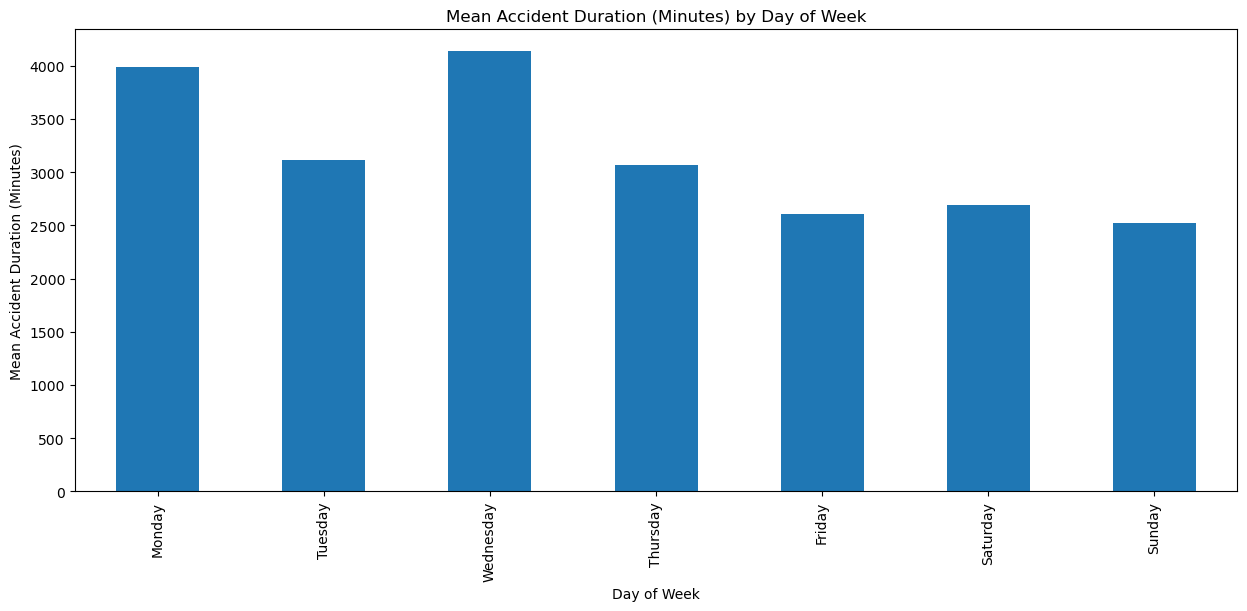

In [16]:
# The Mean of duration of accident by Weekdays
accidents_by_weekday = accident_dur_df_joined.groupby('day_of_week')['Duration_Minutes'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# accidents_by_day.head(10)

# Plot the results
plt.figure(figsize=(15,6))
accidents_by_weekday.plot(kind='bar')
plt.ylabel('Mean Accident Duration (Minutes)')
plt.xlabel('Day of Week')
plt.title('Mean Accident Duration (Minutes) by Day of Week')
plt.show()

### EDA 2 - By Weather Condition

In [17]:
# The Mean of duration of accident by Weather Condition
accident_by_weather = accident_dur_df_joined.groupby('Weather_Condition')['Duration_Minutes'].mean().nlargest(10);

x_values = accident_by_weather.index.tolist()
# Print or use x_values as needed
print(x_values)

['Thunder', 'Mostly Cloudy / Windy', 'Cloudy / Windy', 'Partly Cloudy', 'Fair / Windy', 'Mostly Cloudy', 'Fair', 'Cloudy', 'Light Rain', 'Fog']


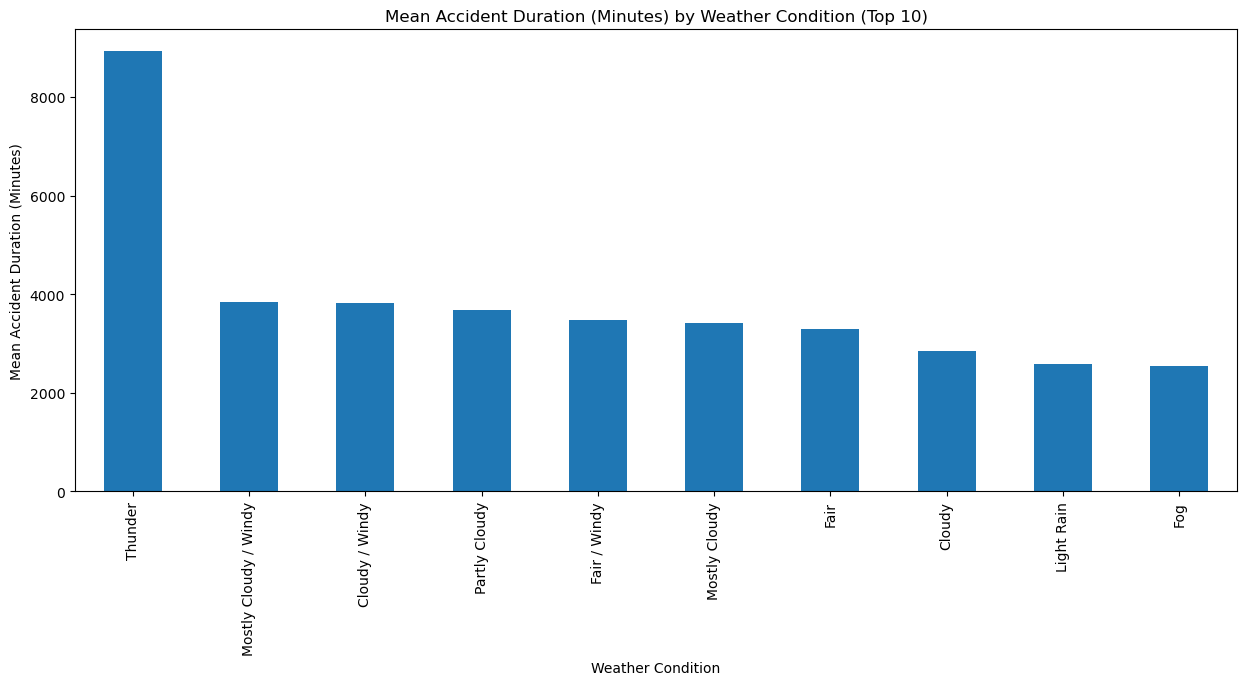

In [18]:
# Plot the results
plt.figure(figsize=(15,6))
accident_by_weather.plot(kind='bar')
plt.ylabel('Mean Accident Duration (Minutes)')
plt.xlabel('Weather Condition')
plt.title('Mean Accident Duration (Minutes) by Weather Condition (Top 10)')
plt.show()

### EDA 3 - By Temperature(F)

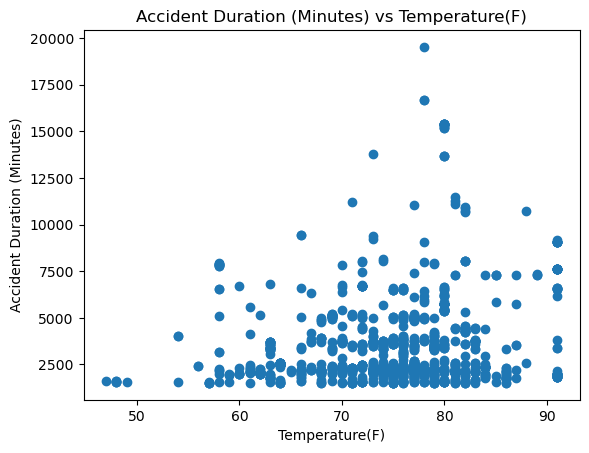

In [19]:
# Scatter plot with 'lagged 1 accident count'
plt.scatter(accident_dur_df_joined['Temperature(F)'], accident_dur_df_joined['Duration_Minutes'])
plt.title('Accident Duration (Minutes) vs Temperature(F)')
plt.xlabel('Temperature(F)')
plt.ylabel('Accident Duration (Minutes)')
plt.show()

### EDA 4 - By Humidity(%)

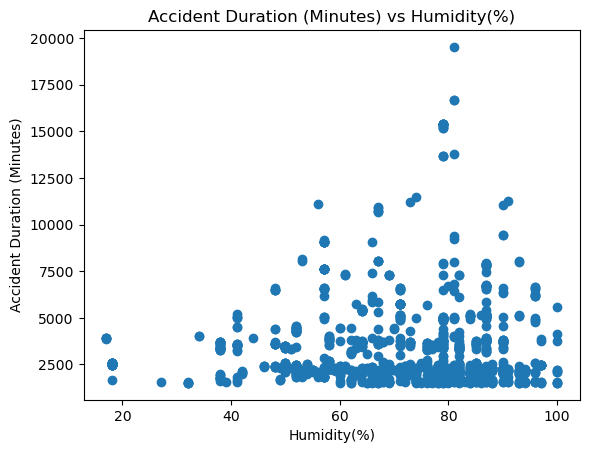

In [20]:
# Scatter plot with 'lagged 1 accident count'
plt.scatter(accident_dur_df_joined['Humidity(%)'], accident_dur_df_joined['Duration_Minutes'])
plt.title('Accident Duration (Minutes) vs Humidity(%)')
plt.xlabel('Humidity(%)')
plt.ylabel('Accident Duration (Minutes)')
plt.show()

### EDA 5 - By Wind_Chill(F)

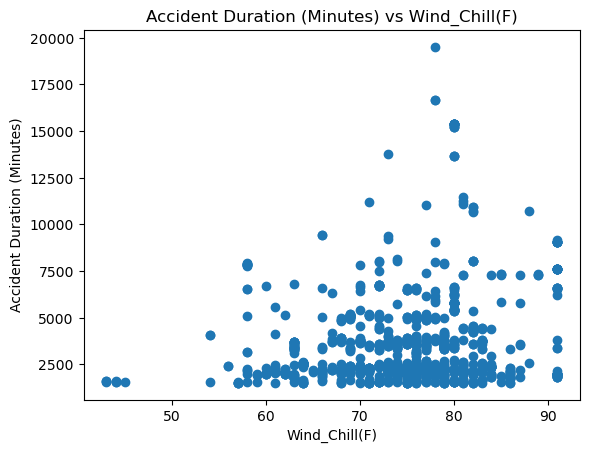

In [21]:

plt.scatter(accident_dur_df_joined['Wind_Chill(F)'], accident_dur_df_joined['Duration_Minutes'])
plt.title('Accident Duration (Minutes) vs Wind_Chill(F)')
plt.xlabel('Wind_Chill(F)')
plt.ylabel('Accident Duration (Minutes)')
plt.show()

### EDA 5 - By Visibility(mi)

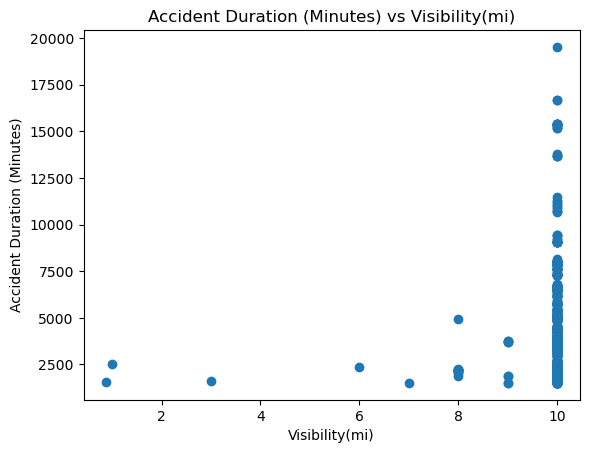

In [22]:
plt.scatter(accident_dur_df_joined['Visibility(mi)'], accident_dur_df_joined['Duration_Minutes'])
plt.title('Accident Duration (Minutes) vs Visibility(mi)')
plt.xlabel('Visibility(mi)')
plt.ylabel('Accident Duration (Minutes)')
plt.show()

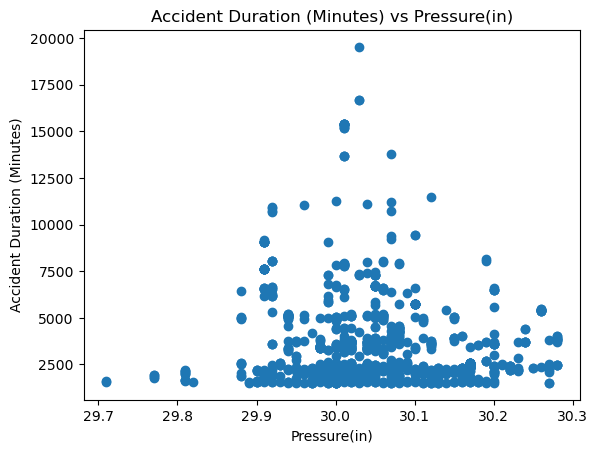

In [23]:
plt.scatter(accident_dur_df_joined['Pressure(in)'], accident_dur_df_joined['Duration_Minutes'])
plt.title('Accident Duration (Minutes) vs Pressure(in)')
plt.xlabel('Pressure(in)')
plt.ylabel('Accident Duration (Minutes)')
plt.show()

#### Linear Regression - weather

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

##### Base Model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features and target variable
features = ['Temperature(F)'
            , 'Pressure(in)'
            ,'Precipitation(in)'
            ,'Humidity(%)'
            ,'Wind_Chill(F)','Wind_Speed(mph)'
            ,'Visibility(mi)'
            ,'Street_encoded'
            ,'City_encoded'
            ]

target = 'Duration_Minutes'

# Train-test split
train, test = train_test_split(accident_dur_df_joined, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(train[features], train[target])

# Make predictions on the test set
predictions = model.predict(test[features])

# Evaluate model performance
mae = mean_absolute_error(test[target], predictions)
mse = mean_squared_error(test[target], predictions)
rmse = sqrt(mse)
r2 = r2_score(test[target], predictions)

results = {
        'Model': 'Linear Regression v1 - Base Model',
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2
    }

model_result = pd.DataFrame([results])
model_result

,Model,MAE,MSE,RMSE,R-squared
0,Linear Regression v1 - Base Model,1457.752299,4.369357e+06,2090.300808,0.049643


##### Add Weather Feature

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features and target variable
features = ['Temperature(F)'
            , 'Pressure(in)'
            ,'Precipitation(in)'
            ,'Humidity(%)'
            ,'Wind_Chill(F)','Wind_Speed(mph)'
            ,'Visibility(mi)'
            ,'Street_encoded'
            ,'City_encoded'
            # below are one-hot-weather joined columns
            ,'Cloudy','Cloudy / Windy','Drizzle','Fair','Fair / Windy'
            ,'Fog','Fog / Windy','Haze','Heavy Rain'
            ,'Heavy Rain / Windy','Heavy T-Storm','Heavy T-Storm / Windy'
            ,'Light Drizzle','Light Drizzle / Windy'
            ,'Light Rain','Light Rain / Windy'
            ,'Light Rain Shower','Light Rain with Thunder','Light Snow'
            ,'Mostly Cloudy','Mostly Cloudy / Windy','Partly Cloudy'
            ,'Partly Cloudy / Windy','Rain','Rain / Windy','Rain Shower'
            , 'Shallow Fog','Showers in the Vicinity','Smoke'
            ,'Squalls / Windy','T-Storm'
              ,'T-Storm / Windy','Thunder','Thunder / Windy'
              ,'Thunder in the Vicinity']

target = 'Duration_Minutes'

# Train-test split
train, test = train_test_split(accident_dur_df_joined, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(train[features], train[target])

# Make predictions on the test set
predictions = model.predict(test[features])

# Evaluate model performance
mae = mean_absolute_error(test[target], predictions)
mse = mean_squared_error(test[target], predictions)
rmse = sqrt(mse)
r2 = r2_score(test[target], predictions)

results = {
        'Model': 'Linear Regression v2 + Weather Condition',
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2
    }

model_result = pd.concat([model_result, pd.DataFrame([results])], ignore_index=True)
model_result

,Model,MAE,MSE,RMSE,R-squared
0,Linear Regression v1 - Base Model,1457.752299,4.369357e+06,2090.300808,0.049643
1,Linear Regression v2 + Weather Condition,1411.104014,4.228133e+06,2056.242468,0.080360


##### Add Weekday Feature

In [27]:
# Define features and target variable
features = ['Temperature(F)'
            , 'Pressure(in)'
            ,'Precipitation(in)'
            ,'Humidity(%)'
            ,'Wind_Chill(F)','Wind_Speed(mph)'
            ,'Visibility(mi)'
            ,'Street_encoded'
            ,'City_encoded'
            # below are one-hot-weather joined columns
            ,'Cloudy','Cloudy / Windy','Drizzle','Fair','Fair / Windy'
            ,'Fog','Fog / Windy','Haze','Heavy Rain'
            ,'Heavy Rain / Windy','Heavy T-Storm','Heavy T-Storm / Windy'
            ,'Light Drizzle','Light Drizzle / Windy'
            ,'Light Rain','Light Rain / Windy'
            ,'Light Rain Shower','Light Rain with Thunder','Light Snow'
            ,'Mostly Cloudy','Mostly Cloudy / Windy','Partly Cloudy'
            ,'Partly Cloudy / Windy','Rain','Rain / Windy','Rain Shower'
            , 'Shallow Fog','Showers in the Vicinity','Smoke'
            ,'Squalls / Windy','T-Storm'
              ,'T-Storm / Windy','Thunder','Thunder / Windy'
              ,'Thunder in the Vicinity'
              # below are one_hot_weekday joined columns
              ,'Friday', 'Monday', 'Saturday'
              , 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'
]

target = 'Duration_Minutes'

# Train-test split
train, test = train_test_split(accident_dur_df_joined, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(train[features], train[target])

# Make predictions on the test set
predictions = model.predict(test[features])

# Evaluate model performance
mae = mean_absolute_error(test[target], predictions)
mse = mean_squared_error(test[target], predictions)
rmse = sqrt(mse)
r2 = r2_score(test[target], predictions)

results = {
        'Model': 'Linear Regression v3 + day of week',
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2
    }

model_result = pd.concat([model_result, pd.DataFrame([results])], ignore_index=True)
model_result

,Model,MAE,MSE,RMSE,R-squared
0,Linear Regression v1 - Base Model,1457.752299,4.369357e+06,2090.300808,0.049643
1,Linear Regression v2 + Weather Condition,1411.104014,4.228133e+06,2056.242468,0.080360
2,Linear Regression v3 + day of week,1370.330755,4.112698e+06,2027.978904,0.105468


#### Ridge Regression

In [28]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Features and target variable
features = ['Temperature(F)'
            , 'Pressure(in)'
            ,'Precipitation(in)'
            ,'Humidity(%)'
            ,'Wind_Chill(F)','Wind_Speed(mph)'
            ,'Visibility(mi)'
            ,'Street_encoded'
            ,'City_encoded'
            # below are one-hot-weather joined columns
            ,'Cloudy','Cloudy / Windy','Drizzle','Fair','Fair / Windy'
            ,'Fog','Fog / Windy','Haze','Heavy Rain'
            ,'Heavy Rain / Windy','Heavy T-Storm','Heavy T-Storm / Windy'
            ,'Light Drizzle','Light Drizzle / Windy'
            ,'Light Rain','Light Rain / Windy'
            ,'Light Rain Shower','Light Rain with Thunder','Light Snow'
            ,'Mostly Cloudy','Mostly Cloudy / Windy','Partly Cloudy'
            ,'Partly Cloudy / Windy','Rain','Rain / Windy','Rain Shower'
            , 'Shallow Fog','Showers in the Vicinity','Smoke'
            ,'Squalls / Windy','T-Storm'
              ,'T-Storm / Windy','Thunder','Thunder / Windy'
              ,'Thunder in the Vicinity'
              # below are one_hot_weekday joined columns
              ,'Friday', 'Monday', 'Saturday'
              , 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'
]
target = 'Duration_Minutes'

# Train-test split
train, test = train_test_split(accident_dur_df_joined, test_size=0.2, random_state=42)

# Initialize and fit the Ridge model with regularization parameter alpha
alpha = 1.0  # You can tune this parameter based on cross-validation
ridge_model = Ridge(alpha=alpha)

# Create a pipeline with standardization and Ridge regression
model = make_pipeline(StandardScaler(), ridge_model)

# Fit the model
model.fit(train[features], train[target])

# Make predictions on the test set
predictions = model.predict(test[features])

# Evaluate model performance
mae = mean_absolute_error(test[target], predictions)
mse = mean_squared_error(test[target], predictions)
rmse = sqrt(mse)
r2 = r2_score(test[target], predictions)

results = {
        'Model': 'Ridge Regression v3 based',
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2
    }

model_result = pd.concat([model_result, pd.DataFrame([results])], ignore_index=True)
model_result

,Model,MAE,MSE,RMSE,R-squared
0,Linear Regression v1 - Base Model,1457.752299,4.369357e+06,2090.300808,0.049643
1,Linear Regression v2 + Weather Condition,1411.104014,4.228133e+06,2056.242468,0.080360
2,Linear Regression v3 + day of week,1370.330755,4.112698e+06,2027.978904,0.105468
3,Ridge Regression v3 based,1367.938110,4.107612e+06,2026.724367,0.106574


#### Lasso Regression

In [29]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Features and target variable
features = ['Temperature(F)'
            , 'Pressure(in)'
            ,'Precipitation(in)'
            ,'Humidity(%)'
            ,'Wind_Chill(F)','Wind_Speed(mph)'
            ,'Visibility(mi)'
            ,'Street_encoded'
            ,'City_encoded'
            # below are one-hot-weather joined columns
            ,'Cloudy','Cloudy / Windy','Drizzle','Fair','Fair / Windy'
            ,'Fog','Fog / Windy','Haze','Heavy Rain'
            ,'Heavy Rain / Windy','Heavy T-Storm','Heavy T-Storm / Windy'
            ,'Light Drizzle','Light Drizzle / Windy'
            ,'Light Rain','Light Rain / Windy'
            ,'Light Rain Shower','Light Rain with Thunder','Light Snow'
            ,'Mostly Cloudy','Mostly Cloudy / Windy','Partly Cloudy'
            ,'Partly Cloudy / Windy','Rain','Rain / Windy','Rain Shower'
            , 'Shallow Fog','Showers in the Vicinity','Smoke'
            ,'Squalls / Windy','T-Storm'
              ,'T-Storm / Windy','Thunder','Thunder / Windy'
              ,'Thunder in the Vicinity'
              # below are one_hot_weekday joined columns
              ,'Friday', 'Monday', 'Saturday'
              , 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'
]
target = 'Duration_Minutes'

# Train-test split
train, test = train_test_split(accident_dur_df_joined, test_size=0.2, random_state=42)

# Initialize and fit the Lasso model with regularization parameter alpha
alpha = 1.0  # You can tune this parameter based on cross-validation
lasso_model = Lasso(alpha=alpha)

# Create a pipeline with standardization and Lasso regression
model = make_pipeline(StandardScaler(), lasso_model)

# Fit the model
model.fit(train[features], train[target])

# Make predictions on the test set
predictions = model.predict(test[features])

# Evaluate model performance
mae = mean_absolute_error(test[target], predictions)
mse = mean_squared_error(test[target], predictions)
rmse = sqrt(mse)
r2 = r2_score(test[target], predictions)

results = {
        'Model': 'Lasso Regression v3 based',
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2
    }
pd.set_option('display.float_format', '{:.6f}'.format)
model_result = pd.concat([model_result, pd.DataFrame([results])], ignore_index=True)
model_result


,Model,MAE,MSE,RMSE,R-squared
0,Linear Regression v1 - Base Model,1457.752299,4369357.466482,2090.300808,0.049643
1,Linear Regression v2 + Weather Condition,1411.104014,4228133.087001,2056.242468,0.080360
2,Linear Regression v3 + day of week,1370.330755,4112698.433953,2027.978904,0.105468
3,Ridge Regression v3 based,1367.938110,4107611.658482,2026.724367,0.106574
4,Lasso Regression v3 based,1368.739674,4107374.692930,2026.665906,0.106626
